In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot as qqplot

# a) Draw a histogram and describe the observations

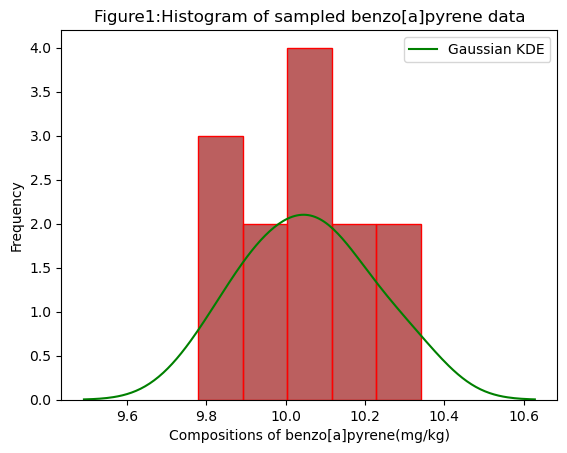

In [3]:
# Given compositions of benzo[a]pyrene in 13 different samples

samples=[9.89,10.06,9.88,10.09,10.15,10.34,9.96,10.1,9.97,10.27,9.78,10.19,10.02]

fig,axis=plt.subplots()
sns.histplot(samples,
             color="brown",edgecolor="red",
             ax=axis)
sns.kdeplot(samples, color='green', ax=axis,label="Gaussian KDE")

axis.set_title(f"Figure1:Histogram of sampled benzo[a]pyrene data")
axis.set_xlabel("Compositions of benzo[a]pyrene(mg/kg)")
axis.set_ylabel("Frequency")
axis.legend(loc="upper right")
axis.grid(False)
plt.show()

## Observations

Explanation:

As we want to infer about the observations in the actual data here. So the histogram has not been normalized.

Observations:

Density/distribution with in the data: From the figure1, it can be observed that, 4 benzo[a]pyrene samples are present with a small range of 10-10.1 mg/kg out of 13 samples in total.Since most of the samples provide the result in this small range, this increases the confidence on this range.

Presence of outliers: From figure1,It can be observed that there are 5 benzo[a]pyrene samples at both ends of histogram out of total 13 sampled observations.Since there are indispensible/sufficient number of the samples present at the left and right ends of the data,we cannot consider the measured compositions of these benzo[a]pyrene samples as outliers. 

Symmerty/Skewness present in the data: The gaussian estimation of the data(kde),from figure 1,visually indicates that data is almost symmetrically distributed with mean of the sampled data(i.e,10.0538) almost equal to the median of the sampled data(i.e,10.06).

# b) Draw a box plot and describe the observations.

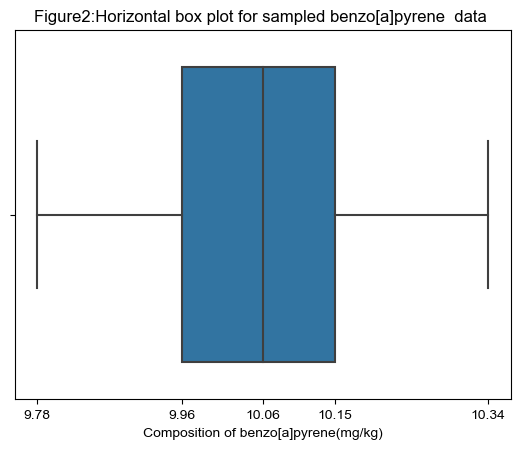

In [3]:
# List of given compositions of benzo[a]pyrene in 13 different samples

samples=[9.89,10.06,9.88,10.09,10.15,10.34,9.96,10.1,9.97,10.27,9.78,10.19,10.02]

fig,axis=plt.subplots()
# Draw a horizontal boxplot for the list of samples
sns.boxplot(x=samples,showfliers=False)
sns.set(style="whitegrid")
axis.set_xlabel("Composition of benzo[a]pyrene(mg/kg)")

# Compute the quartiles:
quartiles=np.quantile(samples, [0,0.25,0.5,0.75,1])

axis.set_title("Figure2:Horizontal box plot for sampled benzo[a]pyrene  data ")
axis.set_xticks(quartiles)
plt.show()

Observations from box plot(Figure 5):
1. The 13 benzoapyrene samples are distributed from 9.78 to 10.34 mg/kg range.i.e; with 0.56 mg/kg.
2. The length of the box present represents that the spread of the data. This is called Interquartile distance. Here, the interquartile distance coveres is 10.15-9.96=0.189
3. It can be observed that 25% of the data is less than 9.96mg/kg(q2) and 75% of the data is less than 10.15mg/kg. The expected lower bound is 9.96-(3/2)*(0.189)=9.6765 mg/kg and the expected upper bound is 10.15+(3/2)*0.189=10.4335 mg/kg. Since the range of the observed data(9.78 to 10.34 mg/kg) is within the limits of the expected upper and lower boundaries, there are no outliers in this case. 
4. Also,box plot indicates(from the middle line in the box) that 50% of the data is less than 10.06. The 50% of the data form q2(9.96) and q3(10.15). The average of the this q2 and q3 i.e(9.96+10.15)/2= 10.055 mg/kg, this very close to median of the data 10.06. On the otherhand, average of maximum and minimum value is (9.78+10.34)/2=10.055 mg/kg. This is again very close to median  of the data. From this understanding, it can be observed that the data is almost evenly spread.

Overall observation:
The box plot give an visual estimation of proportion/even-uneven spread of data present in a particular range, where as histogram gives number of samples contributing to that range.

# c) Which distribution might the data follow? Check your assumption via a corresponding QQ plot.


From the histogram and kernal density estimation of sampled data fro, It can be understood that the samples would most probably follow a gaussian/normal distribution. This can be confirmed by Quantile-Quantile plot. Here, we would be comparing the quantiles of the samples with the quantiles of normal distribution.


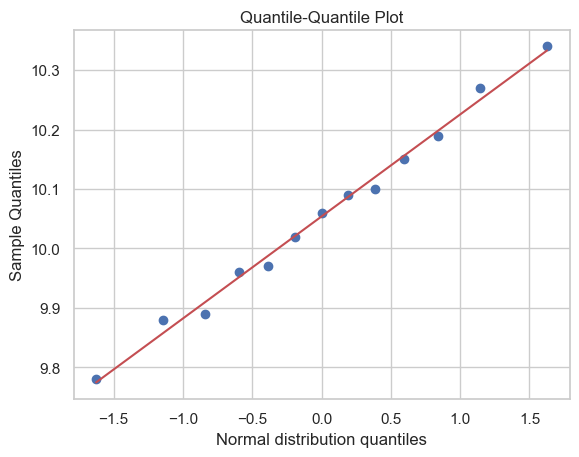

In [8]:
fig,axis=plt.subplots()
#Comparing the samples distribution with the reference normal distribution
qqplot(samples,dist="norm",plot=plt)

# Annotate the title, xaxis and yaxis
axis.set_title("Quantile-Quantile Plot")
axis.set_xlabel("Normal distribution quantiles")
axis.set_ylabel("Sample Quantiles")
axis.grid(True)
plt.show()

Observation:    
Since the quantiles of  quantiles of the sampled data has good correlation with the quantiles of normal distributed,it can be confirmed that the sampled benzo(a)pyrene data follows normal distribution as the sampled distribution has good correlation with normal distribution.

# d(i)
Since we care testing whether the mean of the samples exceed with respect to reference/limit value of 10mg/kg(i.e for location), t-test is being used.But t-test assumes a normality as assumption.This can be tested using sharipo wilk test. 

Here p-value represents largest level of significance

We are currently dealing with only one independendent sample

In [9]:
# Given significance level 
alpha=0.05
# sharipo wilk test for testing assumptions of t-test:
test_statistic_sharipo,p_value_sharipo=stats.shapiro(samples)
print("Assumption:sharipo wilk test for testing normal distribution of the data before performing t-test")
print(f"\ntest_statistic={test_statistic_sharipo},p_value={p_value_sharipo}")

if p_value_sharipo>=alpha:
    print("""\nFails to reject the null hypothesis that the data  follows normal distribution.So,sample is consistent with normal distribution""")
else:
    print("""\nEvidence to reject the null hypothesis that the data follows normal distribution""")

print(100*"=")

# t-test for average content of benzo[a]pyrene in the soil at hand exceeds limit value 10 mg/kg
print("\nPerforming t-test to test whether average content of benzo[a]pyrene in the soil exceeds this limit value 10 mg/kg\n")
ttest_statistic,p_value_ttest=stats.ttest_1samp(samples,popmean=10,alternative="greater")

print(f"\nt-test_statistic={ttest_statistic},p_value={p_value_ttest}")

if p_value_ttest>=alpha:
    print("\nFail to reject the null hypothesis that average content of benzo[a]pyrene in the soil  exceed the limit value of 10 mg/kg.  .")
    print("""\nThere is  enough evidence to conclude that the average content of benzo[a]pyrene in the soil exceeds the limit value of 10 mg/kg. """)
else:
    print("\nReject the null hypothesis that average content of benzo[a]pyrene in the soil  exceed the limit value of 10 mg/kg..")
    print("""\nThere is no enough evidence to conclude that the average content of benzo[a]pyrene in the soil exceeds the limit value of 10 mg/kg.""")



Assumption:sharipo wilk test for testing normal distribution of the data before performing t-test

test_statistic=0.9885572791099548,p_value=0.9991487860679626

Fails to reject the null hypothesis that the data  follows normal distribution.So,sample is consistent with normal distribution

Performing t-test to test whether average content of benzo[a]pyrene in the soil exceeds this limit value 10 mg/kg


t-test_statistic=1.210048075671179,p_value=0.12477882359309975

Fail to reject the null hypothesis that average content of benzo[a]pyrene in the soil  exceed the limit value of 10 mg/kg.  .

There is  enough evidence to conclude that the average content of benzo[a]pyrene in the soil exceeds the limit value of 10 mg/kg. 


# d(ii)

In [10]:
# List of given compositions of benzo[a]pyrene in 13 different samples

samples=np.array([9.89,10.06,9.88,10.09,10.15,10.34,9.96,10.1,9.97,10.27,9.78,10.19,10.02])
alpha=0.05

In [11]:
# benzo[a]pyrene samples that are greater than limit of 10mg/kg
bernoulli_data=samples>10
#number of samples that are greater than 10mg/kg
n_successes=sum(bernoulli_data)
# performing bionomial test to test that more than 50% of the samples are greater than 10mg/kg
bionomial_result=stats.binomtest(k=n_successes,n=len(samples),p=0.5,alternative="greater")

print(f"\nbionomial test statistic={bionomial_result.statistic},p_value={bionomial_result.pvalue}")

if bionomial_result.pvalue>=alpha:
    print("\nFail to reject the null hypothesis")
    print("""\nThere is  enough evidence to conclude that more than 50% of the samples are greater than 10mg/kg """)
else:
    print("\nReject the null hypothesis ")
    print("""\nThere is no enough evidence to conclude that more than 50% of the samples are greater than 10mg/kg """)



bionomial test statistic=0.6153846153846154,p_value=0.29052734375

Fail to reject the null hypothesis

There is  enough evidence to conclude that more than 50% of the samples are greater than 10mg/kg 
